In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from matplotlib import pyplot as plt
from tqdm import tqdm
import pickle
from joblib import dump, load

1it [01:03, 63.85s/it]

16.518966177869586


2it [02:10, 64.66s/it]

15.957256029648086


3it [03:13, 64.19s/it]

16.464329236539143


4it [04:16, 63.80s/it]

16.74638923566574


5it [05:19, 63.66s/it]

16.095060890677303


6it [06:17, 61.83s/it]

17.275661463903


7it [07:15, 60.90s/it]

15.712067222716895


8it [08:16, 60.82s/it]

16.31587293364195


9it [09:15, 60.17s/it]

16.74663107474161


10it [10:13, 59.72s/it]

16.644513171488583
[16.518966177869586, 15.957256029648086, 16.464329236539143, 16.74638923566574, 16.095060890677303, 17.275661463903, 15.712067222716895, 16.31587293364195, 16.74663107474161, 16.644513171488583]
16.44767474368919


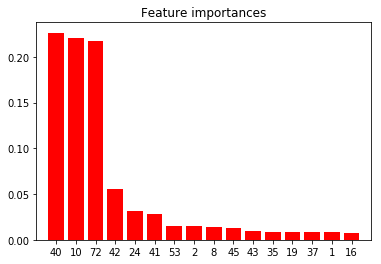

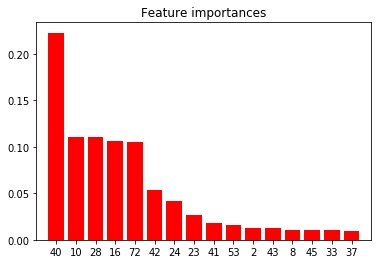

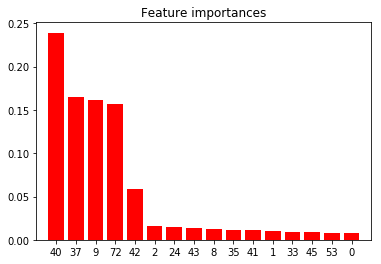

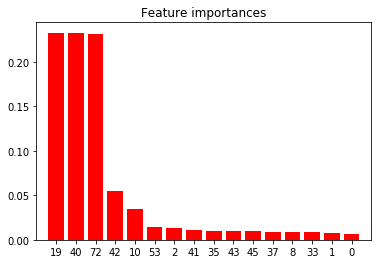

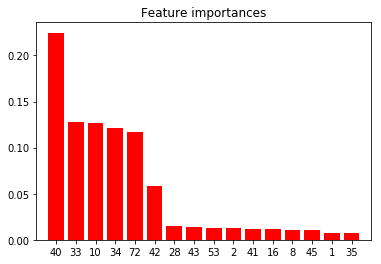

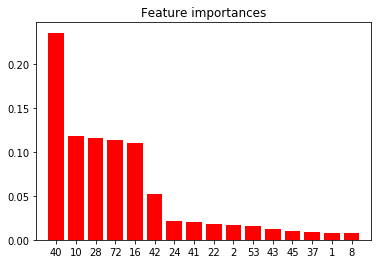

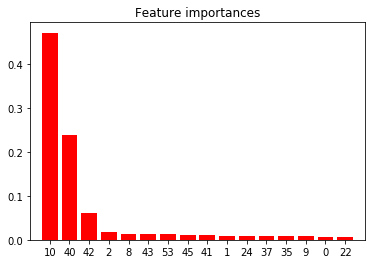

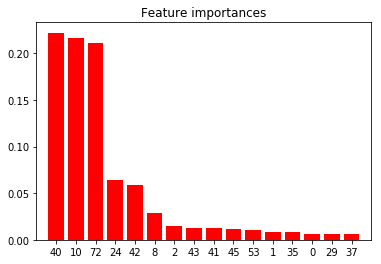

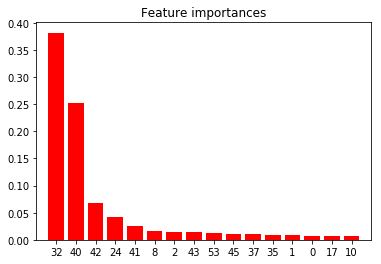

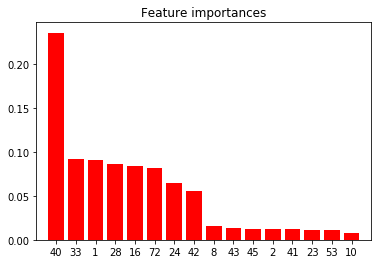

In [2]:
x = np.load('clean_data_matrix_local.npy')
y = np.load('clean_data_target_local.npy')
kfold = KFold(n_splits = 10, shuffle = True, random_state=1)
error = []
err=0
suf=0

for train, test in tqdm(kfold.split(x, y)):
    x_train = x[train]
    y_train = y[train]
    x_test = x[test]
    y_test = y[test]
    '''
    forest = RandomForestRegressor(max_depth=5, random_state=0,n_estimators=1000)
    est = forest.fit(x_train, y_train.ravel())
    '''
    grad = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.1, max_depth=1, random_state=0, loss='lad')
    est = grad.fit(x_train, y_train.ravel())
    '''
    vecreg = svm.SVR()
    est = vecreg.fit(x_train, y_train.ravel())
    '''
    print(median_absolute_error(y_test, est.predict(x_test)))
    error.append(median_absolute_error(y_test, est.predict(x_test)))
    
    importances = est.feature_importances_
    std = np.std([importances],axis=0)
    indices = np.argsort(importances)[::-1]
    
    
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(16), importances[indices[:16]],color="r")
    plt.xticks(range(16), indices[:16])
    plt.xlim([-1, 16])
    plt.plot()
    plt.savefig('important/impFeat'+str(suf))
    
    

print(error)
for i in error:
    err += i
print(err/10)

In [3]:
x = np.load('clean_data_matrix_local.npy')
y = np.load('clean_data_target_local.npy')

print(x.shape)
print(y.shape)


grad = GradientBoostingRegressor(n_estimators=10000, learning_rate=0.1, max_depth=1, random_state=0, loss='lad')
est = grad.fit(x, y.ravel())

dump(est, 'model(16.44).joblib') 


(8166, 129)
(8166, 1)


['model(16.44).joblib']

In [7]:
x = np.load('clean_data_matrix_mean.npy')
print(x.shape)

(8290, 130)
